#### Algorithm Chains and data pipelines

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
# load the data

cancer = load_breast_cancer()
type(cancer)

sklearn.utils.Bunch

In [14]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state = 0)
print(type(X_train), X_train.shape)
print(type(X_test), X_test.shape)
print(type(y_train), y_train.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (398, 30)
<class 'numpy.ndarray'> (171, 30)
<class 'numpy.ndarray'> (398,)
<class 'numpy.ndarray'> (171,)


In [15]:
# Scaling

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [16]:
# Building the machine learning model

svm = SVC()

In [17]:
svm.fit(X_train_scaled, y_train)

C:\Users\manig\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
X_test_scaled = scaler.transform(X_test)
print(svm.score(X_test_scaled, y_test))

0.9473684210526315


In [22]:
# model improvement through Grid search

from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}

In [25]:
grid = GridSearchCV(SVC(), param_grid = param_grid, n_jobs = -1, cv = 5)
grid.fit(X_train_scaled, y_train)
best_score = grid.best_score_
print("The cross validation score is: ", best_score)

The cross validation score is:  0.9773869346733668


In [27]:
grid.score(X_test_scaled, y_test)
params = grid.best_params_
print("The best parameters are: ", params)

The best parameters are:  {'C': 10, 'gamma': 1}


 Building pipelines

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

# Here, we created two steps. The first, called "scaler" - an instance of MinMaxScaler
# Second,"svm" - an instance of SVC

In [32]:
import warnings
warnings.filterwarnings("ignore")


pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [36]:
score = pipe.score(X_test, y_test)
print("The score is: {:.3f}".format(score))

The score is: 0.947


In [37]:
# Calling the "score" method, 
# first transforms the test data using the scaler
# secondly, calls the score method on the SVM using the scaled data

In [38]:
# Using the pipeline, we reduced the code needed for our "preprocessing" and "classifiction" process

In [41]:
"""IMPORTANT NOTE"""

# Using pipelines in grid searches

# It works the same way as using any other estimator
# 1. Define a parameter grid to search over, and construct a GridSearchCV and the parameter grid
# 2. Note: The syntax is to specify each parameter, followed by __ (a double underscore) followed by the parameter name
# 3. For example, for the parameter "C" in svm (=SVC()), we have to use, "svm__C" as the key in the parameter grid dict

'IMPORTANT NOTE'

In [42]:
param_grid = {"svm__C":[0.001,0.01,0.1,1,10,100], "svm__gamma":[0.001,0.01,0.1,1,10,100]}

# Now we can proceed as usual for GridSearchCV

In [43]:
grid = GridSearchCV(pipe, param_grid = param_grid, n_jobs = -1, cv = 10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
print(grid.best_score_)

0.9773869346733668


In [45]:
# fitting for the test data

grid.fit(X_test, y_test)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
best_params = grid.best_params_

In [47]:
print(best_params)

{'svm__C': 100, 'svm__gamma': 0.1}


In [49]:
import mglearn

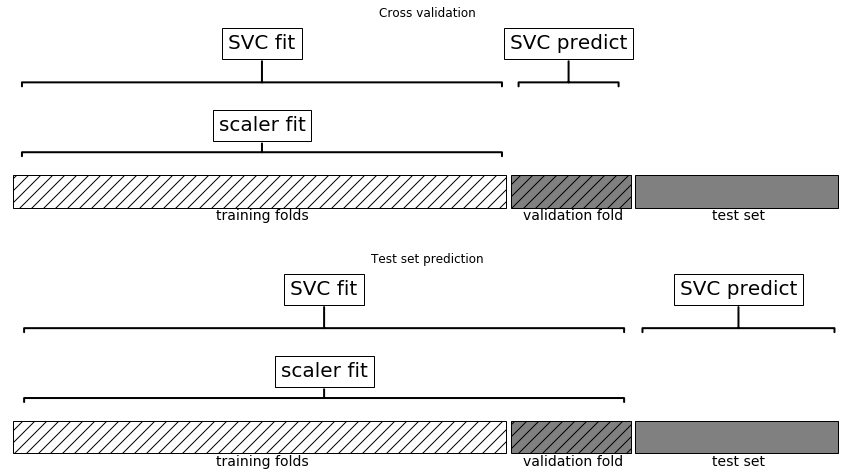

In [50]:
mglearn.plots.plot_proper_processing()

### Information leakage in cross-validation
1. The impact of leakage of information leakage in the cross-validation varies depending on the nature of the preprocessing step.
2. Estimating the scale of the data using the test fold usually doesn't have a terrible impact.
3. While using the test fold in feature extraction and feature selection can lead to substantial differences in outcomes.

In [53]:
import numpy as np
import pandas as pd

rnd = np.random.RandomState(seed = 0)
X = rnd.normal(size = (100,10000))
y = rnd.normal(size = (100,))

In [55]:
from sklearn.feature_selection import SelectPercentile, f_regression
select = SelectPercentile(score_func = f_regression, percentile = 5).fit(X,y)
X_selected = select.transform(X)
print(X_selected.shape)

(100, 500)


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
score = cross_val_score(Ridge(), X_selected, y, cv = 5)

In [77]:
cross_val_score = np.mean(score)
cross_val_score

0.9057953065239822

In [78]:
# This is the computed R squared value, indicating a very good model
# Our feature selection picked out some features among 10000 random features that are well correlated with the target
# Because we fit the feature selection outside of the cross_validation, it could find features that are correlated with both training and test folds
# The information we leaked from test folds was informative and lead to high unrealistic results
# Let's compare this using a pipeline

In [83]:
pipe = Pipeline([("select", SelectPercentile(score_func = f_regression, percentile = 5)), 
                  ("ridge", Ridge())])

In [85]:
np.mean(cross_val_score(pipe, X, y, cv =5))

TypeError: 'numpy.float64' object is not callable

In [86]:
# as per the book, the accuracy was -0.25 indicating a very poor model. using pipeline, the feature selection is inside the cv loop
# this means, the features can be only selected using the training folds and not the test folds

Convenient Pipeline creation

In [87]:
from sklearn.pipeline import make_pipeline

In [88]:
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

# This is a long version of the syntax

In [90]:
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

# This is a short version of the syntax

In [91]:
print(pipe_short.steps)

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]


In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [93]:
pipe = make_pipeline(StandardScaler(), PCA(n_components = 2), StandardScaler())

In [94]:
pipe.steps

[('standardscaler-1',
  StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('standardscaler-2',
  StandardScaler(copy=True, with_mean=True, with_std=True))]

ACCESSING THE STEP ATTRIBUTES

In [96]:
# fit the pipeline above to the cancer dataset

pipe.fit(cancer.data)

Pipeline(memory=None,
     steps=[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [102]:
components = pipe.named_steps["pca"].components_

In [105]:
components

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [106]:
components.shape

(2, 30)

ACCESSING THE ATTRIBUTES IN A GRIDSEARCH PIPELINE

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [109]:
param_grid = {"logisticregression__C":[0.01, 0.1, 1, 10, 100]}

In [110]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [111]:
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [112]:
# Accessing the best coefficients of the LR model

grid.best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [113]:
# Accessing the logistic regression step

grid.best_estimator_.named_steps["logisticregression"]

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.34544958, -0.38444935, -0.33988553, -0.3505656 , -0.16913186,
        -0.03157163, -0.32665637, -0.42678968, -0.2045492 ,  0.16941073,
        -0.53273967, -0.00933038, -0.43498257, -0.40182175,  0.07447853,
         0.24949134,  0.0994215 , -0.07708802,  0.09495805,  0.26302164,
        -0.49111303, -0.48321499, -0.46467249, -0.45726692, -0.32629663,
        -0.16551265, -0.37312226, -0.48736181, -0.36902284, -0.18518844]])

GRID SEARCH PREPROCESSING STEPS AND MODEL PARAMETERS

In [116]:
from sklearn.datasets import load_boston

In [119]:
boston = load_boston()

In [120]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

In [121]:
from sklearn.preprocessing import PolynomialFeatures

In [131]:
pipe = make_pipeline(StandardScaler(), 
                     PolynomialFeatures(), 
                     Ridge())

In [132]:
param_grid = {"polynomialfeatures__degree":[1,2,3], "ridge__alpha":[0.01, 0.1, 1, 10, 100]}

In [133]:
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, n_jobs = -1)

In [134]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [135]:
import matplotlib.pyplot as plt

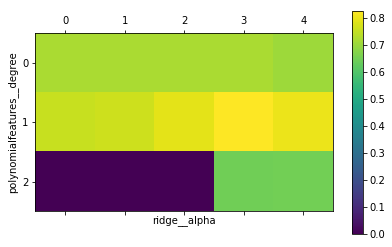

In [137]:
plt.matshow(grid.cv_results_["mean_test_score"].reshape(3,-1), vmin = 0, cmap = "viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.colorbar()

In [138]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

In [139]:
grid.score(X_test, y_test)

0.7683045464100142

In [140]:
# Grid searching which model to use

In [141]:
pipe = Pipeline([('preprocessing', StandardScaler()),
                 ("classifier",SVC())])

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
param_grid = [
    {'classifier':[SVC()], 'preprocessing':[StandardScaler(),None],
    'classifier__gamma':[0.001,0.01,0.1,1,10,100],
    'classifier__C':[0.001,0.01,0.1,1,10,100]},
    {'classifier':[RandomForestClassifier(n_estimators = 100)], 'preprocessing':[None],
    'classifier__max_features':[1,2,3]}]

In [152]:
grid = GridSearchCV(pipe, param_grid = param_grid, n_jobs=-1, cv = 5)

In [153]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

In [154]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'classifier': [SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)], 'preprocessing': [StandardScaler(copy=True, with...=0,
            warm_start=False)], 'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [155]:
grid.best_params_

{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'classifier__C': 10,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [156]:
grid.best_score_

0.9859154929577465

In [157]:
grid.score(X_test,y_test)

0.9790209790209791